In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from skhep.visual import MplPlotter as skh_plt
import os
import tdrstyle as tdr

ROOT.gStyle.SetOptStat(0)
tdr.setTDRStyle()

Welcome to JupyROOT 6.16/00


In [154]:
def Energy_loss(jet_pt, L):
    C = 0.065
    dE_avg = C*pow(jet_pt,1)*pow(L,1)
    random = ROOT.TRandom3()
    dE = random.PoissonD(dE_avg)
    
    return dE

In [80]:
f_hM = ROOT.TFile('../GlauberMC/plots/histogram-R1R2.root','READ')
f_hM.cd()
hM_R1R2 = f_hM.Get('hM_R1R2')
hM_R1R2.SetDirectory(0)
f_hM.Close()

In [155]:
f = ROOT.TFile('./data/dijet_events.root','READ')
tree = ROOT.gROOT.FindObject("EventTree")

hM_xJ = ROOT.TH1F('hM_xJ','hM_xJ',20,0,1)
hM_xJ_dE = ROOT.TH1F('hM_xJ_dE','hM_xJ_dE',20,0,1)
hM_AJ = ROOT.TH1F('hM_AJ','hM_AJ',20,0,1)
hM_AJ_dE = ROOT.TH1F('hM_AJ_dE','hM_AJ_dE',20,0,1)

nEntries =  tree.GetEntries()
for iEntry in range(0,nEntries):
    tree.GetEntry(iEntry)
    
    if len(tree.pT) < 2:
        continue
        
    pT_jet1 = -1.
    pT_jet2 = -1.
    if tree.pT[0] > tree.pT[1]:
        pT_jet1 = tree.pT[0]
        pT_jet2 = tree.pT[1]
    else:
        pT_jet1 = tree.pT[1]
        pT_jet2 = tree.pT[0]
    
    xJ = pT_jet2/pT_jet1
    AJ = (pT_jet1-pT_jet2)/(pT_jet1+pT_jet2)
    
    L1 = ROOT.Double(0.0)
    L2 = ROOT.Double(0.0)
    hM_R1R2.GetRandom2(L1,L2)
    
    dE_jet1 = Energy_loss(pT_jet1, L1)
    dE_jet2 = Energy_loss(pT_jet2, L2)
    
    pT_jet1_dE = pT_jet1 - dE_jet1
    pT_jet2_dE = pT_jet2 - dE_jet2
    if pT_jet1_dE < pT_jet2_dE:
        tmp = pT_jet2_dE
        pT_jet2_dE = pT_jet1_dE
        pT_jet1_dE = tmp
    
    xJ_dE = pT_jet2_dE/pT_jet1_dE
    AJ_dE = (pT_jet1_dE-pT_jet2_dE)/(pT_jet1_dE+pT_jet2_dE)
    
    if iEntry < 10:
        print (xJ,xJ_dE)
    
    hM_xJ.Fill(xJ)
    hM_xJ_dE.Fill(xJ_dE)
    hM_AJ.Fill(AJ)
    hM_AJ_dE.Fill(AJ_dE)

0.7138020800819048 0.6151066224259736
0.8814903744083796 0.6476372337274322
0.9436955912973211 0.5261652003920271
0.9185468114839115 0.7649254449794699
0.967750661626551 0.5568974542689892
0.7309044634813725 0.9167964662227452
0.7789147954476401 0.2631791099279307
0.9790038770890708 0.6231548793873142
0.9086279201224564 0.3978151075425306
0.85787284137939 0.5931296420405738


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./plots/xJ-inclusive-pp-EnergyLoss-function3.png has been created
Info in <TCanvas::Print>: pdf file ./plots/xJ-inclusive-pp-EnergyLoss-function3.pdf has been created


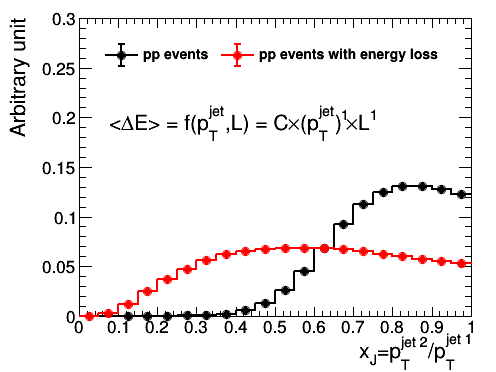

In [156]:
hM_xJ.Scale(1./hM_xJ.Integral(-1,-1))
hM_xJ_dE.Scale(1./hM_xJ_dE.Integral(-1,-1))

c = ROOT.TCanvas('c', 'c', 500, 400)
c.cd()
ROOT.gPad.SetRightMargin(0.05)
ROOT.gPad.SetBottomMargin(0.15)
hM_xJ.SetLineWidth(2)
hM_xJ.GetXaxis().SetTitle('x_{J}=p_{T}^{jet 2}/p_{T}^{jet 1}')
hM_xJ.GetYaxis().SetTitle('Arbitrary unit')
hM_xJ.GetXaxis().SetTitleOffset(1.0)
hM_xJ.GetYaxis().SetRangeUser(0,0.3)
hM_xJ.Draw('histe1X0')

hM_xJ_dE.SetLineWidth(2)
hM_xJ_dE.SetLineColor(2)
hM_xJ_dE.SetMarkerColor(2)
hM_xJ_dE.Draw('histe1X0same')

legend = ROOT.TLegend(0.2,0.8,0.92,0.9)
legend.SetNColumns(2)
legend.AddEntry(hM_xJ,'pp events','leX0p')
legend.AddEntry(hM_xJ_dE,'pp events with energy loss','leX0p')
legend.Draw('same')

latex = ROOT.TLatex()
latex.SetNDC()
latex.SetTextFont(42)
latex.SetTextSize(0.06)
latex.DrawLatex(0.22, 0.65, '<#DeltaE> = f(p_{T}^{jet},L) = C#times(p_{T}^{jet})^{1}#timesL^{1}')

c.Draw()
c.SaveAs('./plots/xJ-inclusive-pp-EnergyLoss-function3.png')
c.SaveAs('./plots/xJ-inclusive-pp-EnergyLoss-function3.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./plots/AJ-inclusive-pp-EnergyLoss-function3.png has been created
Info in <TCanvas::Print>: pdf file ./plots/AJ-inclusive-pp-EnergyLoss-function3.pdf has been created


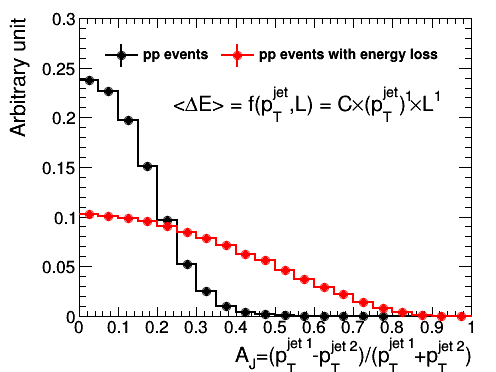

In [157]:
hM_AJ.Scale(1./hM_AJ.Integral(-1,-1))
hM_AJ_dE.Scale(1./hM_AJ_dE.Integral(-1,-1))

c = ROOT.TCanvas('c', 'c', 500, 400)
c.cd()
ROOT.gPad.SetRightMargin(0.05)
ROOT.gPad.SetBottomMargin(0.15)
hM_AJ.SetLineWidth(2)
hM_AJ.GetXaxis().SetTitle('A_{J}=(p_{T}^{jet 1}-p_{T}^{jet 2})/(p_{T}^{jet 1}+p_{T}^{jet 2})')
hM_AJ.GetYaxis().SetTitle('Arbitrary unit')
hM_AJ.GetXaxis().SetTitleOffset(1.1)
hM_AJ.GetYaxis().SetRangeUser(0,0.3)
hM_AJ.Draw('histe1X0')

hM_AJ_dE.SetLineWidth(2)
hM_AJ_dE.SetLineColor(2)
hM_AJ_dE.SetMarkerColor(2)
hM_AJ_dE.Draw('histe1X0same')

legend = ROOT.TLegend(0.2,0.8,0.92,0.9)
legend.SetNColumns(2)
legend.AddEntry(hM_xJ,'pp events','leX0p')
legend.AddEntry(hM_xJ_dE,'pp events with energy loss','leX0p')
legend.Draw('same')

latex = ROOT.TLatex()
latex.SetNDC()
latex.SetTextFont(42)
latex.SetTextSize(0.06)
latex.DrawLatex(0.35, 0.7, '<#DeltaE> = f(p_{T}^{jet},L) = C#times(p_{T}^{jet})^{1}#timesL^{1}')

c.Draw()
c.SaveAs('./plots/AJ-inclusive-pp-EnergyLoss-function3.png')
c.SaveAs('./plots/AJ-inclusive-pp-EnergyLoss-function3.pdf')